In [1]:
#importaciones de las librerias
import pandas as pd
import numpy as np
import sklearn as sl
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("retrasos.csv")#Leemos el fichero csv y pasandolo a dataframe
data

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,31,4,UA,19977,UA,N776UA,200,12016,1201602,GUM,...,HNL,749.0,0.0,0700-0759,1832.0,0.0,0.0,0.0,3801.0,NaN
583981,31,4,UA,19977,UA,N36280,174,12016,1201602,GUM,...,SPN,717.0,0.0,0700-0759,759.0,0.0,0.0,0.0,129.0,NaN
583982,31,4,UA,19977,UA,N36280,117,14955,1495503,SPN,...,GUM,857.0,0.0,0900-0959,933.0,0.0,0.0,0.0,129.0,NaN
583983,31,4,UA,19977,UA,N39726,105,14955,1495503,SPN,...,GUM,1820.0,0.0,1800-1859,1854.0,0.0,0.0,0.0,129.0,NaN


In [3]:
data.drop_duplicates(keep=False,inplace=True)#Eliminamos los datos duplicados
data

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,31,4,UA,19977,UA,N776UA,200,12016,1201602,GUM,...,HNL,749.0,0.0,0700-0759,1832.0,0.0,0.0,0.0,3801.0,NaN
583981,31,4,UA,19977,UA,N36280,174,12016,1201602,GUM,...,SPN,717.0,0.0,0700-0759,759.0,0.0,0.0,0.0,129.0,NaN
583982,31,4,UA,19977,UA,N36280,117,14955,1495503,SPN,...,GUM,857.0,0.0,0900-0959,933.0,0.0,0.0,0.0,129.0,NaN
583983,31,4,UA,19977,UA,N39726,105,14955,1495503,SPN,...,GUM,1820.0,0.0,1800-1859,1854.0,0.0,0.0,0.0,129.0,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

In [5]:
#Eliminamos las columnas repetidas o que no aporten ninguna informacion
data=data.drop(columns=['OP_CARRIER','DEP_DEL15','ARR_DEL15','CANCELLED','DIVERTED','Unnamed: 21'])

In [6]:
conditionlist = [
    (data['DAY_OF_MONTH'] >= 1) & (data['DAY_OF_MONTH'] <=7),
    (data['DAY_OF_MONTH'] >= 8) & (data['DAY_OF_MONTH'] <=14),
    (data['DAY_OF_MONTH'] >= 15) & (data['DAY_OF_MONTH'] <=22),
    (data['DAY_OF_MONTH'] <= 31)]
choicelist = ['Semana1', 'Semana2', 'Semana3','Semana4']
data['Etiqueta'] = np.select(conditionlist, choicelist, default='Not Specified')


In [7]:
data

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_TIME_BLK,ARR_TIME,DISTANCE,Etiqueta
0,1,2,9E,20363,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0600-0659,722.0,300.0,Semana1
1,1,2,9E,20363,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,1400-1459,1633.0,596.0,Semana1
2,1,2,9E,20363,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,1200-1259,1329.0,229.0,Semana1
3,1,2,9E,20363,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,1500-1559,1625.0,223.0,Semana1
4,1,2,9E,20363,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,1900-1959,1940.0,579.0,Semana1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,31,4,UA,19977,N776UA,200,12016,1201602,GUM,12173,1217305,HNL,749.0,0700-0759,1832.0,3801.0,Semana4
583981,31,4,UA,19977,N36280,174,12016,1201602,GUM,14955,1495503,SPN,717.0,0700-0759,759.0,129.0,Semana4
583982,31,4,UA,19977,N36280,117,14955,1495503,SPN,12016,1201602,GUM,857.0,0900-0959,933.0,129.0,Semana4
583983,31,4,UA,19977,N39726,105,14955,1495503,SPN,12016,1201602,GUM,1820.0,1800-1859,1854.0,129.0,Semana4


In [8]:
enero=data.groupby(['Etiqueta'])['DEP_TIME'].count()

<AxesSubplot:xlabel='Etiqueta'>

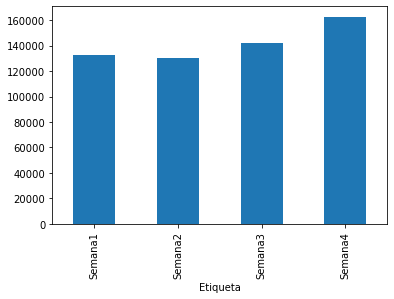

In [9]:
enero.plot(kind='bar')

In [10]:
ej3=data.groupby(['ORIGIN'])['OP_CARRIER_AIRLINE_ID'].count()
ej31=pd.DataFrame(ej3)
by_origin = ej31.sort_values('ORIGIN',ascending=False)
var_x=by_origin.head(5)
#5 companias con mas problemas
by_origin.head(5)

,OP_CARRIER_AIRLINE_ID
ORIGIN,
YUM,115
YAK,60
XNA,1048
WRG,62
VPS,494


In [11]:
#Guardamos en un dataframe las compañias que mas problemas han tenido, un dataframe para cada compañia
#Como hemos visto en el dataframe anterior
compañia1 = data[data["OP_CARRIER_AIRLINE_ID"] == 19393]
compañia2 = data[data["OP_CARRIER_AIRLINE_ID"] == 19805]
compañia3 = data[data["OP_CARRIER_AIRLINE_ID"] == 19790]
compañia4 = data[data["OP_CARRIER_AIRLINE_ID"] == 20304]
compañia5 = data[data["OP_CARRIER_AIRLINE_ID"] == 19977]
var_x=compañia1.append([compañia2,compañia3,compañia4,compañia5])
var_x

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_TIME_BLK,ARR_TIME,DISTANCE,Etiqueta
5893,1,2,WN,19393,N297WN,1959,10140,1014005,ABQ,10821,1082106,BWI,928.0,0900-0959,1440.0,1670.0,Semana1
5894,1,2,WN,19393,N7811F,45,10140,1014005,ABQ,11259,1125904,DAL,1430.0,1400-1459,1740.0,580.0,Semana1
5895,1,2,WN,19393,N925WN,172,10140,1014005,ABQ,11259,1125904,DAL,1947.0,1900-1959,2245.0,580.0,Semana1
5896,1,2,WN,19393,N7845A,244,10140,1014005,ABQ,11259,1125904,DAL,NaN,0001-0559,NaN,580.0,Semana1
5897,1,2,WN,19393,N8311Q,704,10140,1014005,ABQ,11259,1125904,DAL,708.0,0700-0759,937.0,580.0,Semana1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,31,4,UA,19977,N776UA,200,12016,1201602,GUM,12173,1217305,HNL,749.0,0700-0759,1832.0,3801.0,Semana4
583981,31,4,UA,19977,N36280,174,12016,1201602,GUM,14955,1495503,SPN,717.0,0700-0759,759.0,129.0,Semana4
583982,31,4,UA,19977,N36280,117,14955,1495503,SPN,12016,1201602,GUM,857.0,0900-0959,933.0,129.0,Semana4
583983,31,4,UA,19977,N39726,105,14955,1495503,SPN,12016,1201602,GUM,1820.0,1800-1859,1854.0,129.0,Semana4


In [12]:
origin1 = data[data["ORIGIN"] == "YUM"]
origin2 = data[data["ORIGIN"] == "YAK"]
origin3 = data[data["ORIGIN"] == "XNA"]
origin4 = data[data["ORIGIN"] == "WRG"]
origin5 = data[data["ORIGIN"] == "VPS"]
var_y=origin1.append([origin2,origin3,origin4,origin5])
var_y

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_TIME_BLK,ARR_TIME,DISTANCE,Etiqueta
3149,1,2,OO,20304,N751SK,2978,16218,1621802,YUM,14107,1410702,PHX,1120.0,1100-1159,1222.0,160.0,Semana1
3161,1,2,OO,20304,N746SK,2988,16218,1621802,YUM,14107,1410702,PHX,1742.0,1700-1759,1833.0,160.0,Semana1
3236,1,2,OO,20304,N748EV,3060,16218,1621802,YUM,14107,1410702,PHX,2116.0,2100-2159,2238.0,160.0,Semana1
30946,2,3,OO,20304,N748EV,2967,16218,1621802,YUM,14107,1410702,PHX,646.0,0600-0659,736.0,160.0,Semana1
30959,2,3,OO,20304,N727SK,2978,16218,1621802,YUM,14107,1410702,PHX,1118.0,1100-1159,1215.0,160.0,Semana1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575407,31,4,AA,19805,N9628W,2603,15624,1562404,VPS,11298,1129806,DFW,NaN,1300-1359,NaN,641.0,Semana4
578987,31,4,EV,20366,N14902,4310,15624,1562404,VPS,12266,1226603,IAH,906.0,0900-0959,1122.0,528.0,Semana4
579234,31,4,OH,20397,N517AE,5500,15624,1562404,VPS,11057,1105703,CLT,1428.0,1400-1459,1716.0,460.0,Semana4
579304,31,4,OH,20397,N565NN,5564,15624,1562404,VPS,11057,1105703,CLT,927.0,0900-0959,1229.0,460.0,Semana4


In [ ]:
#falta bubble

# Ejercicio 3

<AxesSubplot:xlabel='DEP_TIME'>

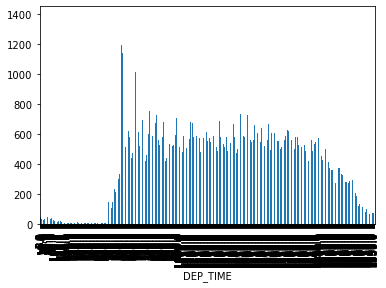

In [20]:
retrasos=data.groupby(['DEP_TIME'])['ARR_TIME'].count()
retrasos.plot(kind='bar')

In [14]:
data.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_TIME_BLK', 'ARR_TIME', 'DISTANCE', 'Etiqueta'],
      dtype='object')

# Ejercicio 4 

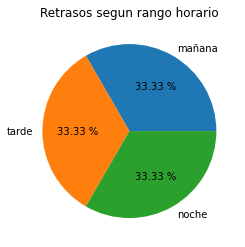

In [36]:
mañana=data[data['DEP_TIME']>=800 & (data['DEP_TIME']<=1500)].count()[0]
tarde=data[data['DEP_TIME']>1500 & (data['DEP_TIME']<=2359) | (data['DEP_TIME']==0000)].count()[0]
noche=data[data['DEP_TIME']>0000 & (data['DEP_TIME']<800)].count()[0]
labels=['mañana','tarde','noche']
plt.pie([mañana,tarde,noche],labels=labels,autopct='%.2f %%')
plt.title('Retrasos segun rango horario')
plt.show()
#He usado un diagrama de quesos para representar la diferencia entre los tres rangos horarios
#